# Anemia - Random Forest

In [2]:
import some_load_train_evaluate_functions as ml

In [3]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [4]:
# Anemia data

anemia_df = ml.get_data_of_disease(driver, 'Anemia')
anemia_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Anemia
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
8878,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8879,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8880,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [5]:
random_forest = ml.RandomForestClassifier(random_state=42)

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

random_forest.fit(X_train, y_train)

# Accuracy scores

y_pred = random_forest.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, random_forest.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.997466572836031
Testing Accuracy:  0.9980292792792793


## Feature Selection

### Correlation Analysis

In [6]:
random_forest_test = ml.RandomForestClassifier(random_state=42, n_jobs=-1)

In [7]:
pos_corr, neg_corr = ml.get_correlated_features(anemia_df,'Anemia',pos=0.0,neg=-0.0)

corr_features = list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10])
corr_features.remove('Respondent_ID')
corr_features[:30]

['Red cell distribution width [%]',
 'Transferrin receptor [nmol/L]',
 'Platelet_Lymphocyte Ratio',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Triglyceride [mmol/L]',
 'Triglyceride_HDL Ratio',
 'Gamma Glutamyl Transferase [IU/L]',
 'Potassium [mmol/L]',
 'Hydroxycotinine [ng/mL]',
 'Vitamin C [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Cis-beta-carotene [umol/L]',
 'Cotinine [ng/mL]',
 'Retinyl stearate [umol/L]']

In [8]:
ml.evaluate_feature_set(corr_features[:30], random_forest_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 0.992

Recall: 0.949

F1-Score: 0.970


### SelectFromModel

In [9]:
sfm_features = ml.select_from_model_features(random_forest_test,X,y)
sfm_features

['Age',
 'BMI',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio',
 'Blood Urea Nitrogen [mg/dL]',
 'Blood manganese [nmol/L]',
 'Blood selenium [umol/L]',
 'Cobalt [nmol/L]',
 'Hematocrit [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'RBC count [million cells/uL]',
 'Red cell distribution width [%]',
 'Retinol [umol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'White blood cell count [1000 cells/uL]',
 'Alkaline Phosphatase [IU/L]',
 'C-Reactive Protein [mg/L]',
 'Ferritin [ng/mL]',
 'Hemoglobin [g/dL]',
 'Lactate Dehydrogenase [IU/L]',
 'Transferrin receptor [nmol/L]']

In [10]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, random_forest_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 0.992

Recall: 0.949

F1-Score: 0.970


### SelectKBest

In [11]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Transferrin receptor [nmol/L]',
 'RBC count [million cells/uL]',
 'Albumin [g/dL]',
 'Gender',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Mean cell hemoglobin [pg]',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'Age',
 'UIBC [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Total Calcium [mg/dL]',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Bilirubin [mg/dL]',
 'Globulin [g/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Mean cell volume [fL]',
 'Segmented neutrophils [%]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Lymphocyte [%]']

In [12]:
ml.evaluate_feature_set(k_best_features[:30], random_forest_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 1.000

Recall: 0.949

F1-Score: 0.974


### Recursive Feature Elimination (RFE) 

In [13]:
rfe_features = ml.select_rfe_features(random_forest_test,X,y,n=30,step=0.5)
rfe_features[:30]

['Platelet_WBC Ratio',
 'Mean cell hemoglobin [pg]',
 'Lutein and zeaxanthin [umol/L]',
 'Mean cell volume [fL]',
 'Iron [ug/dL]',
 'Neutrophil_Lymphocyte Ratio',
 'Hematocrit [%]',
 'Osmolality [mmol/Kg]',
 'Transferrin receptor [nmol/L]',
 'Creatine Phosphokinase [IU/L]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Ferritin [ng/mL]',
 'Cobalt [nmol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Hemoglobin [g/dL]',
 'Mean Cell Hgb Conc. [g/dL]',
 'RBC count [million cells/uL]',
 'Blood manganese [nmol/L]',
 'Red cell distribution width [%]',
 'Blood cadmium [nmol/L]',
 'Age',
 'UIBC [umol/L]',
 'BMI',
 'Lactate Dehydrogenase [IU/L]',
 'Blood selenium [umol/L]',
 'Alpha-crypotoxanthin [umol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'A/G Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]']

In [14]:
ml.evaluate_feature_set(rfe_features[:30], random_forest_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 1.000

Recall: 0.941

F1-Score: 0.970


### Lasso Regularization

In [15]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Gender',
 'Red cell distribution width [%]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Age',
 'Alpha-crypotoxanthin [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Blood mercury [nmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Retinol [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Hydroxycotinine [ng/mL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'RBC count [million cells/uL]',
 'Total Calcium [mg/dL]',
 'Alanine Aminotransferase [U/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Glycohemoglobin [%]',
 'Total Cholestrol_HDL Ratio',
 'Uric Acid [mg/dL]',
 'Trans-lycopene [umol/L]',
 'Sodium [mmol/L]',
 'Transferrin Saturation [%]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Blood cadmium [nmol/L]',
 'Iron frozen [umol/L]',
 'Fasting Glucose [mmol/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Blood Urea Nitrogen [mg/dL]']

In [16]:
ml.evaluate_feature_set(l1_selected_features[:30], random_forest_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.996

Test Accuracy: 0.997

Precision: 1.000

Recall: 0.919

F1-Score: 0.958


### Relief F

In [17]:
relieff_features = ml.relief_feature_select(30,X,y)

In [18]:
relieff_features[:30]

['Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Segmented neutrophils [%]',
 'Lymphocyte [%]',
 'BMI',
 'Neutrophil_Lymphocyte Ratio',
 'RBC count [million cells/uL]',
 'Mean cell volume [fL]',
 'Mean cell hemoglobin [pg]',
 'Red cell distribution width [%]',
 'A/G Ratio',
 'Transferrin Saturation [%]',
 'Gender',
 'Albumin [g/dL]',
 'Uric Acid [mg/dL]',
 'Systemic Immune‐inflammation Index (SII)',
 'Platelet_Lymphocyte Ratio',
 'Iron [ug/dL]',
 'Osmolality [mmol/Kg]',
 'Iron frozen [umol/L]',
 'Retinol [umol/L]',
 'Total Calcium [mg/dL]',
 'Chloride [mmol/L]',
 'Non_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'UIBC [umol/L]',
 'Globulin [g/dL]',
 'Blood selenium [umol/L]',
 'Bicarbonate [mmol/L]']

In [19]:
ml.evaluate_feature_set(relieff_features[:30], random_forest_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 1.000

Recall: 0.949

F1-Score: 0.974


### Random Forest Feature Importances

In [21]:
random_forest_features = ml.get_rand_forest_features(random_forest, X_train)
random_forest_features[:30]

['BMI',
 'Age',
 'Hematocrit [%]',
 'Red cell distribution width [%]',
 'RBC count [million cells/uL]',
 'Hemoglobin [g/dL]',
 'Mean Cell Hgb Conc. [g/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Platelet count [1000 cells/uL]',
 'Mean cell volume [fL]',
 'Blood selenium [umol/L]',
 'Mean cell hemoglobin [pg]',
 'Iron frozen [umol/L]',
 'Iron [ug/dL]',
 'Ferritin [ng/mL]',
 'A/G Ratio',
 'Transferrin receptor [nmol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Monocyte [%]',
 'Cobalt [nmol/L]',
 'Lactate Dehydrogenase [IU/L]',
 'White blood cell count [1000 cells/uL]',
 'Osmolality [mmol/Kg]',
 'Platelet_WBC Ratio',
 'C-Reactive Protein [mg/L]',
 'Mean platelet volume [fL]',
 'Alkaline Phosphatase [IU/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Platelet_Lymphocyte Ratio']

In [22]:
ml.evaluate_feature_set(random_forest_features, random_forest_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 1.000

Recall: 0.949

F1-Score: 0.974


### Optimal no. of features

In [30]:
final_features = list(random_forest_features) 

Finding optimal no. of features..: 100%|████████| 85/85 [06:45<00:00,  4.77s/it]


Maximum accuracy = 0.9619 for 42 features


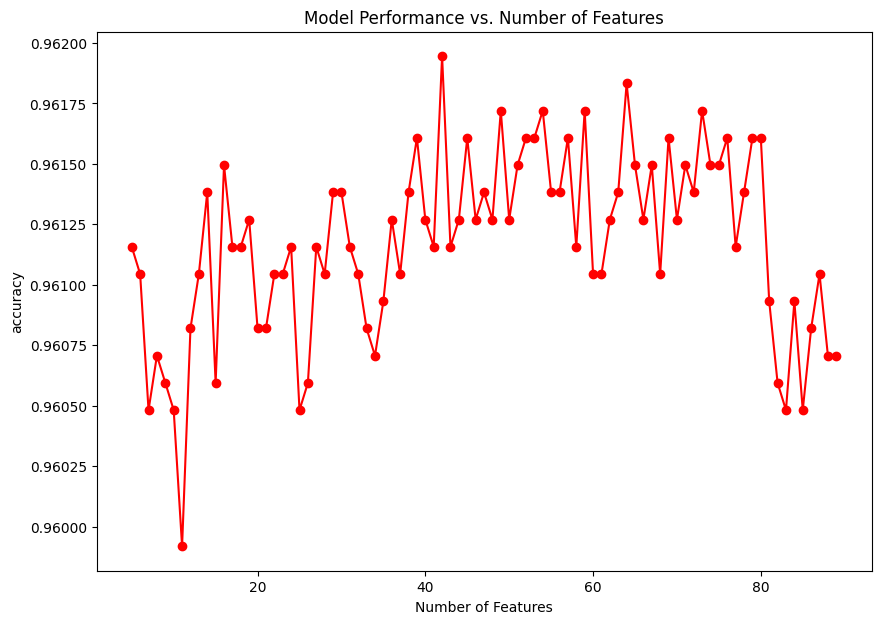

In [31]:
# Optimal no. of features

ml.plot_num_feature_performance(random_forest_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 85/85 [06:52<00:00,  4.85s/it]


Maximum f1 = 0.1058 for 5 features


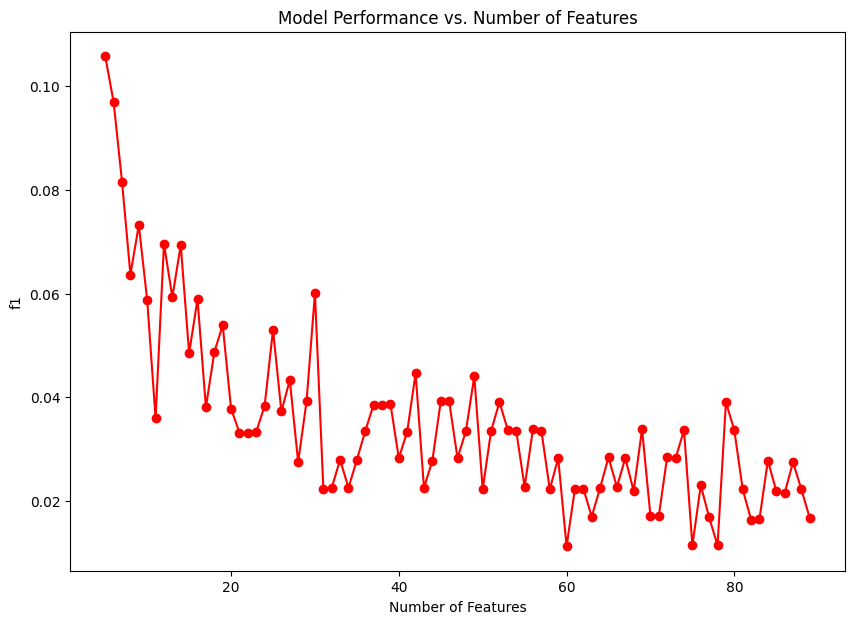

In [35]:
# Optimal no. of features

ml.plot_num_feature_performance(random_forest_test,  X, y, final_features, scoring='f1')

Finding optimal no. of features..: 100%|████████| 85/85 [07:47<00:00,  5.50s/it]


Maximum recall = 0.0619 for 5 features


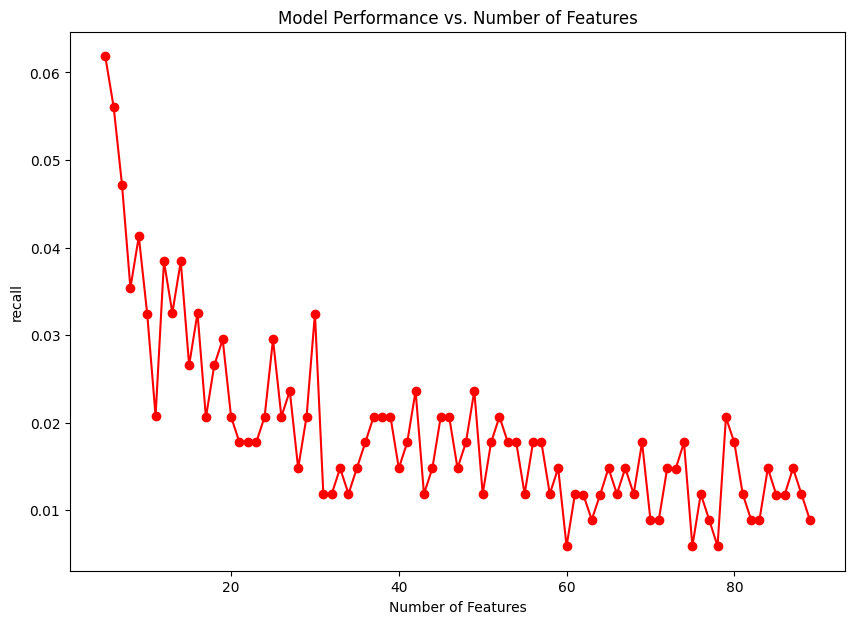

In [36]:
# Optimal no. of features

ml.plot_num_feature_performance(random_forest_test,  X, y, final_features, scoring='recall')

In [37]:
num_features = 5

selected = final_features[:num_features]
selected.append('Anemia')

anemia_df = anemia_df[selected]

In [38]:
# Save feature set
    
with open('../Models/Anemia/Feature Sets/Random Forest Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### No Imputation

In [39]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                        impute = False, scale=True,
                                                        imputer=None,
                                                        random_state=42)

In [40]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 0.965

Test Accuracy: 0.966

Precision: 1.000

Recall: 0.103

F1-Score: 0.187


### Zero Imputation

In [41]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [42]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 0.992

Recall: 0.949

F1-Score: 0.970


### Mode Imputation

In [43]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [44]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 0.992

Recall: 0.949

F1-Score: 0.970


### k-NN Imputation

In [45]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [46]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 1.000

Recall: 0.941

F1-Score: 0.970


### Multiple Imputation by Chained Equations (MICE)

In [47]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [48]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 1.000

Recall: 0.941

F1-Score: 0.970


### Mean Imputation

In [49]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [50]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 0.992

Recall: 0.949

F1-Score: 0.970


### Median Imputation

In [51]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df, label = 'Anemia',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [52]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 0.997

Test Accuracy: 0.998

Precision: 1.000

Recall: 0.941

F1-Score: 0.970


### Dropping Null Values

In [7]:
# Drop null values
anemia_df_na = anemia_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = anemia_df_na, label = 'Anemia',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [54]:
random_forest.fit(X_train, y_train)

ml.evaluate_model_metrics(random_forest,X_train,y_train,X_val,y_val)


Train Accuracy: 1.000

Test Accuracy: 1.000

Precision: 1.000

Recall: 1.000

F1-Score: 1.000


## Oversampling and Undersampling

### Random Oversampling

In [55]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

random_forest.fit(X_ros, y_ros)

ml.evaluate_model_metrics(random_forest,X_ros, y_ros,X_val, y_val)


Train Accuracy: 1.000

Test Accuracy: 1.000

Precision: 1.000

Recall: 1.000

F1-Score: 1.000


### SMOTE (Synthetic Minority Over-sampling Technique)

In [56]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

random_forest.fit(X_smote, y_smote)

ml.evaluate_model_metrics(random_forest,X_smote, y_smote,X_val, y_val)


Train Accuracy: 1.000

Test Accuracy: 1.000

Precision: 1.000

Recall: 1.000

F1-Score: 1.000


### Random Undersampling

In [57]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

random_forest.fit(X_rus, y_rus)

ml.evaluate_model_metrics(random_forest,X_rus, y_rus,X_val, y_val)


Train Accuracy: 1.000

Test Accuracy: 0.748

Precision: 0.136

Recall: 1.000

F1-Score: 0.239


### Tomek Links

In [58]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

random_forest.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(random_forest,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 1.000

Test Accuracy: 0.997

Precision: 0.950

Recall: 0.983

F1-Score: 0.966


### SMOTE + Tomek Links

In [59]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

random_forest.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(random_forest,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 1.000

Test Accuracy: 0.999

Precision: 0.966

Recall: 1.000

F1-Score: 0.983


In [60]:
X_train, y_train = X_smote_tomek, y_smote_tomek

## Hyperparameter Optimization 

### Grid Search

In [61]:
param_grid = {
    
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_jobs': [-1],
    'random_state': [42]

}

In [62]:
grid_best_params, random_forest_grid = ml.grid_search_optimize(random_forest, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [63]:
grid_best_params

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_jobs': -1,
 'random_state': 42}

In [64]:
ml.evaluate_model_metrics(random_forest_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 1.000

Test Accuracy: 0.998

Precision: 0.958

Recall: 1.000

F1-Score: 0.979


### Random Search

In [65]:
rand_best_params, random_forest_rand = ml.random_search_optimize(random_forest,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [66]:
rand_best_params

{'random_state': 42,
 'n_jobs': -1,
 'max_features': 'sqrt',
 'criterion': 'gini',
 'bootstrap': False}

In [67]:
ml.evaluate_model_metrics(random_forest_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 1.000

Test Accuracy: 0.998

Precision: 0.958

Recall: 1.000

F1-Score: 0.979


### Optuna

In [68]:
def objective(trial):

    params = {
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'n_jobs': trial.suggest_categorical('n_jobs', [-1])
    }
     
    model = ml.RandomForestClassifier(**params)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [69]:
best_trial , random_forest_opt = ml.optuna_optimize(objective, ml.RandomForestClassifier, n_trials=150)

In [70]:
best_trial

{'bootstrap': False, 'criterion': 'entropy', 'n_jobs': -1}

In [71]:
random_forest_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(random_forest_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 1.000

Test Accuracy: 0.998

Precision: 0.958

Recall: 1.000

F1-Score: 0.979


## Evaluation on Test Set


Train Accuracy: 0.700

Test Accuracy: 0.994

Precision: 0.982

Recall: 0.884

F1-Score: 0.930

Confusion Matrix:

[[2786    2]
 [  14  107]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00      2788
     Class 1       0.98      0.88      0.93       121

    accuracy                           0.99      2909
   macro avg       0.99      0.94      0.96      2909
weighted avg       0.99      0.99      0.99      2909


ROC-AUC Curve:


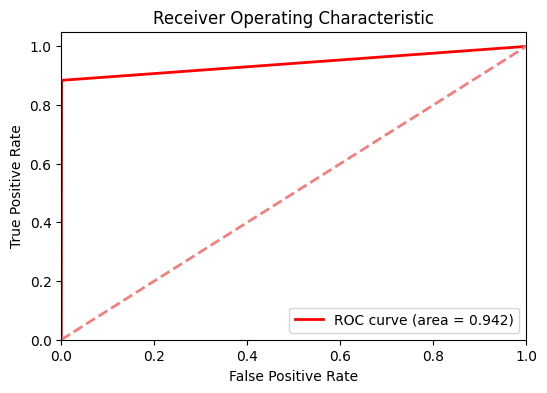

In [80]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(random_forest_grid, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [72]:
ml.k_cross_validate(random_forest,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96016484 0.96153846 0.96011004 0.96148556 0.95873453 0.96011004
 0.96423659 0.96148556 0.95873453 0.95323246]

Mean accuracy score:  0.9599832595190229

Standard deviation:  0.002716253189084146


In [73]:
ml.k_cross_validate(random_forest_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.9532967  0.95879121 0.96011004 0.96286107 0.95460798 0.95735901
 0.95735901 0.95873453 0.95735901 0.95048143]

Mean accuracy score:  0.9570959989116797

Standard deviation:  0.003353564806906469


In [74]:
ml.k_cross_validate(random_forest_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.9532967  0.95879121 0.96011004 0.96286107 0.95460798 0.95735901
 0.95735901 0.95873453 0.95735901 0.95048143]

Mean accuracy score:  0.9570959989116797

Standard deviation:  0.003353564806906469


In [75]:
ml.k_cross_validate(random_forest_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95741758 0.95879121 0.96011004 0.95873453 0.95323246 0.95598349
 0.96011004 0.95873453 0.95323246 0.94635488]

Mean accuracy score:  0.9562701225871789

Standard deviation:  0.004076247608172492


### Stratified K-fold

In [76]:
ml.stratified_k_cross_validate(random_forest,X,y,n_splits=10)


Average Accuracy: 0.9605334658463958

Average Precision: 0.4083333333333333

Average Recall: 0.07376847290640394

Average F1-Score: 0.12371538728037779


In [77]:
ml.stratified_k_cross_validate(random_forest_grid,X,y,n_splits=10)


Average Accuracy: 0.9573707241864051

Average Precision: 0.34146103896103897

Average Recall: 0.09852216748768473

Average F1-Score: 0.15120439764402613


In [78]:
ml.stratified_k_cross_validate(random_forest_rand,X,y,n_splits=10)


Average Accuracy: 0.9573707241864051

Average Precision: 0.34146103896103897

Average Recall: 0.09852216748768473

Average F1-Score: 0.15120439764402613


In [79]:
ml.stratified_k_cross_validate(random_forest_opt,X,y,n_splits=10)


Average Accuracy: 0.9576465831280137

Average Precision: 0.3280952380952381

Average Recall: 0.07746305418719211

Average F1-Score: 0.12210830105566946


### Save Model

In [81]:
final_random_forest_estimator = random_forest_grid

In [82]:
# Saving the model

ml.save_model(final_random_forest_estimator, "../Models/Anemia/Random_Forest_Classifier.pkl")

Saved Model


## Prediction

In [83]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_random_forest_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [-0.02862807  0.43725155 -0.22620931 -0.28612704 -0.44380087]

Expected Class:  0

 Modified Instance:
 [-0.02862807  0.4653761  -0.10735372 -0.44024751 -0.45269579]

Predicted Class:  [0]


In [88]:
ml.predict_on_modified_instance(final_random_forest_estimator, X_test.iloc[49], y_test.iloc[49], 0.3)

Instance:
 [ 0.09421753  1.01660647 -0.39442247  0.57128929  0.17654491]

Expected Class:  1

 Modified Instance:
 [ 0.09421753  0.87735195 -0.41765886  0.34315754  0.33692214]

Predicted Class:  [0]
